# Analyzing Poverty in the Inland Empire 

##### UP 206A | Winter 2021 | By Angelica Ruiz

For this second part of the assignment, I'll be exploring poverty data that I downloaded from the Census Reporter as a GeoJSON file. Similarly to the previous part 'a', I downloaded the census tracts within Riverside County only. I was unable to download two counties' census tracts in the same file. So, until I figure out how to combine the two GeoJSON files, I'm only going to be analyzing Riverside County. 

## Loading the Libraries

As always, I must first load the libraries before conducting any kind of analysis.

In [1]:
#load libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Import Data

Next, I'll import the Riverside County census tract GeoJSON file.

In [2]:
#import the Riverside county poverty census tracts
rp_gdf = gpd.read_file('poverty_data/acs2019_R_poverty.geojson')

## Prelim Inspection

Now that I imported the data, I'm going to do some intial inspection of it to see basic information about it. I'll look at how large the file is and what the first few rows look like.

In [3]:
#number of rows and columns
rp_gdf.shape

(454, 121)

In [4]:
#peek-a-boo
rp_gdf.head()

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
0,05000US06065,"Riverside County, CA",2373706.0,3634.0,325279.0,7576.0,146534.0,3879.0,15209.0,983.0,...,1113.0,133212.0,936.0,121023.0,807.0,90715.0,770.0,71455.0,749.0,"MULTIPOLYGON (((-117.67244 33.87026, -117.6725..."
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,89.0,189.0,136.0,90.0,76.0,0.0,12.0,...,21.0,57.0,29.0,22.0,20.0,24.0,20.0,20.0,20.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,329.0,633.0,257.0,349.0,170.0,15.0,24.0,...,72.0,57.0,34.0,115.0,47.0,20.0,20.0,18.0,18.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,794.0,408.0,373.0,209.0,0.0,17.0,...,228.0,352.0,102.0,369.0,115.0,248.0,112.0,51.0,47.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,405.0,230.0,96.0,119.0,64.0,7.0,11.0,...,77.0,246.0,97.0,274.0,74.0,200.0,75.0,148.0,74.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."


# Clean Up the Data

Nothing looks suspicious in the data, so now I'm going to clean it up and delete the first row that tells us info about the entire county. I'm interested in specific census tracts, so it's not important to me.

In [4]:
#drop the first row (called row 0)
rp_gdf = rp_gdf.drop([0])

In [5]:
#confirm it was dropped
rp_gdf.head()

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,89.0,189.0,136.0,90.0,76.0,0.0,12.0,...,21.0,57.0,29.0,22.0,20.0,24.0,20.0,20.0,20.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,329.0,633.0,257.0,349.0,170.0,15.0,24.0,...,72.0,57.0,34.0,115.0,47.0,20.0,20.0,18.0,18.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,794.0,408.0,373.0,209.0,0.0,17.0,...,228.0,352.0,102.0,369.0,115.0,248.0,112.0,51.0,47.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,405.0,230.0,96.0,119.0,64.0,7.0,11.0,...,77.0,246.0,97.0,274.0,74.0,200.0,75.0,148.0,74.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,306.0,813.0,259.0,440.0,236.0,0.0,12.0,...,72.0,129.0,65.0,113.0,72.0,156.0,92.0,70.0,47.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


## Dropping Columns

This dataset has lots of interesting variables, but I'm only going to focus on looking at the percent below poverty level and percent at or above poverty level. As of right now, I wasn't able to find poverty data where all the age levels are merged together (i.e. 'under 18 years old' and 'above 18 year old'). The current breakdown by age is too overwhelming and I don't think it would benefit my analysis, since I'm not focusing on age for my project. I looked at the `metadata.json` for the definitions of each code.

In [6]:
#list the column names
list(rp_gdf)

['geoid',
 'name',
 'B17001001',
 'B17001001, Error',
 'B17001002',
 'B17001002, Error',
 'B17001003',
 'B17001003, Error',
 'B17001004',
 'B17001004, Error',
 'B17001005',
 'B17001005, Error',
 'B17001006',
 'B17001006, Error',
 'B17001007',
 'B17001007, Error',
 'B17001008',
 'B17001008, Error',
 'B17001009',
 'B17001009, Error',
 'B17001010',
 'B17001010, Error',
 'B17001011',
 'B17001011, Error',
 'B17001012',
 'B17001012, Error',
 'B17001013',
 'B17001013, Error',
 'B17001014',
 'B17001014, Error',
 'B17001015',
 'B17001015, Error',
 'B17001016',
 'B17001016, Error',
 'B17001017',
 'B17001017, Error',
 'B17001018',
 'B17001018, Error',
 'B17001019',
 'B17001019, Error',
 'B17001020',
 'B17001020, Error',
 'B17001021',
 'B17001021, Error',
 'B17001022',
 'B17001022, Error',
 'B17001023',
 'B17001023, Error',
 'B17001024',
 'B17001024, Error',
 'B17001025',
 'B17001025, Error',
 'B17001026',
 'B17001026, Error',
 'B17001027',
 'B17001027, Error',
 'B17001028',
 'B17001028, Error',
 

In [7]:
#columns to keep
columns_to_keep = ['geoid',
                   'name',
                   'B17001001',
                   'B17001002',
                   'B17001031',
                   'geometry']

In [8]:
#redefine `rp_gdf` to only include the columns I want
rp_gdf = rp_gdf[columns_to_keep]

In [9]:
#confirm it kept the columns I wanted
rp_gdf.head()

,geoid,name,B17001001,B17001002,B17001031,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,230.0,4239.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,813.0,2533.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


## Rename Columns

Now, I'll rename the columns so I can do my analysis. Again, I look at the `metadata.json` file for the names.

In [12]:
#rename columns
rp_gdf.columns = ['geoid',
                  'name',
                  'Total',
                  'Income in the past 12 months below poverty level',
                  'Income in the past 12 months at or above poverty level',
                 'geometry']

In [13]:
rp_gdf.head()

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,230.0,4239.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,813.0,2533.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


## Simple Statistics and Plots

Next, I'll look at descriptive statistics of the data, such as the mean, median, min and max of thos who had an income in the past 12 months that was below the poverty level. Then, I'll plot the data on the histogram just to get a visual.

In [14]:
#descriptive statistics
rp_gdf['Income in the past 12 months below poverty level'].describe()

count     453.000000
mean      718.055188
std       530.670147
min         0.000000
25%       337.000000
50%       612.000000
75%       944.000000
max      3839.000000
Name: Income in the past 12 months below poverty level, dtype: float64

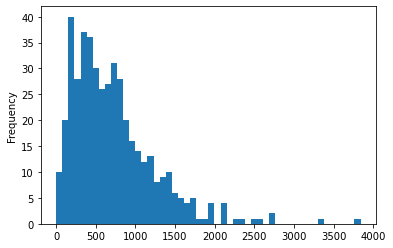

In [15]:
#histogram
rp_gdf['Income in the past 12 months below poverty level'].plot.hist(bins=50)

The histogram above show that in each census tract the number of individuals whose income in the past 12 month was below the poverty level was below 2,000 for the most part. There seems to be only a few census tracts where the poverty level was high. 

## Normalize the Data

Due to the fact that each census tract varies in the population, I'm going to normalize the data so that I can compare across census tracts.

In [16]:
#get names of columns
list(rp_gdf)

['geoid',
 'name',
 'Total',
 'Income in the past 12 months below poverty level',
 'Income in the past 12 months at or above poverty level',
 'geometry']

In [17]:
#normalizing all the columns
rp_gdf['Percent Below Poverty Level'] = rp_gdf['Income in the past 12 months below poverty level']/rp_gdf['Total']*100
rp_gdf['Percent At or Above Poverty Level'] = rp_gdf['Income in the past 12 months at or above poverty level']/rp_gdf['Total']*100

In [18]:
#peek-a-boo
rp_gdf.head()

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry,Percent Below Poverty Level,Percent At or Above Poverty Level
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",15.869018,84.130982
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748...",27.885463,72.114537
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778...",10.379085,89.620915
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,230.0,4239.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274...",5.146565,94.853435
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,813.0,2533.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891...",24.297669,75.702331


# Map Time!

Now that the data is squeaky clean, I can start mapping it to get an idea of the poverty percent in the cenus tracts in Riverside County.

Text(0.5, 1.0, 'Percent Below Poverty Level')

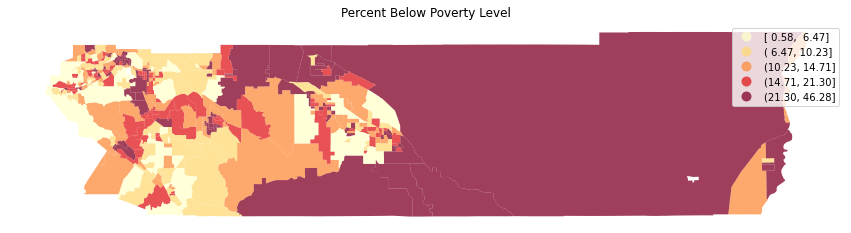

In [22]:
#first create the subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 12))

#next, give each subplot a name
ax1 = axs

#percent below poverty level map (left)
rp_gdf.plot(column='Percent Below Poverty Level', 
            cmap='YlOrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True,
           )

ax1.axis("off")
ax1.set_title("Percent Below Poverty Level")

# Conclusion

This was a very interesting analysis. It's interesting to see how this map overlaps with the race map. Overall, you can see that a large amount of the census tracts in Riverside County have high percent of people living below theh poverty level. 